In [1]:
# Libraries
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from scipy import stats
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot
#from pandas.tools.plotting import scatter_matrix
from pylab import rcParams
from matplotlib import collections as collections
from matplotlib.patches import Rectangle
from itertools import cycle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score 

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
from numpy import median
from numpy import mean

from imblearn.over_sampling import SMOTE


In [2]:
train = pd.read_csv('default of credit card clients.csv')

In [3]:
train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
train.rename(columns={'default payment next month':'defaultPay'}, inplace=True)

In [5]:
train['defaultPay'].value_counts()

0    23364
1     6636
Name: defaultPay, dtype: int64

In [6]:
train.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defaultPay'],
      dtype='object')

In [7]:
train.shape

(30000, 25)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          30000 non-null  int64
 1   LIMIT_BAL   30000 non-null  int64
 2   SEX         30000 non-null  int64
 3   EDUCATION   30000 non-null  int64
 4   MARRIAGE    30000 non-null  int64
 5   AGE         30000 non-null  int64
 6   PAY_0       30000 non-null  int64
 7   PAY_2       30000 non-null  int64
 8   PAY_3       30000 non-null  int64
 9   PAY_4       30000 non-null  int64
 10  PAY_5       30000 non-null  int64
 11  PAY_6       30000 non-null  int64
 12  BILL_AMT1   30000 non-null  int64
 13  BILL_AMT2   30000 non-null  int64
 14  BILL_AMT3   30000 non-null  int64
 15  BILL_AMT4   30000 non-null  int64
 16  BILL_AMT5   30000 non-null  int64
 17  BILL_AMT6   30000 non-null  int64
 18  PAY_AMT1    30000 non-null  int64
 19  PAY_AMT2    30000 non-null  int64
 20  PAY_AMT3    30000 non-null  

In [9]:
train.isnull().sum()

ID            0
LIMIT_BAL     0
SEX           0
EDUCATION     0
MARRIAGE      0
AGE           0
PAY_0         0
PAY_2         0
PAY_3         0
PAY_4         0
PAY_5         0
PAY_6         0
BILL_AMT1     0
BILL_AMT2     0
BILL_AMT3     0
BILL_AMT4     0
BILL_AMT5     0
BILL_AMT6     0
PAY_AMT1      0
PAY_AMT2      0
PAY_AMT3      0
PAY_AMT4      0
PAY_AMT5      0
PAY_AMT6      0
defaultPay    0
dtype: int64

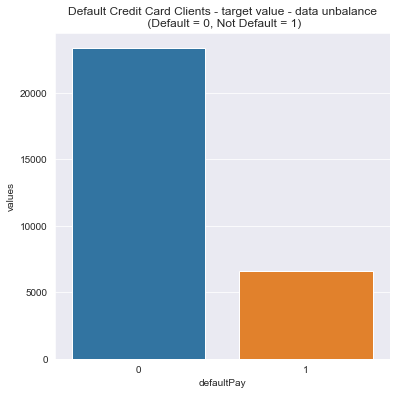

In [10]:
sb.set_style("darkgrid")

temp = train["defaultPay"].value_counts()
df = pd.DataFrame({'defaultPay': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sb.set_color_codes("pastel")
sb.barplot(x = 'defaultPay', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

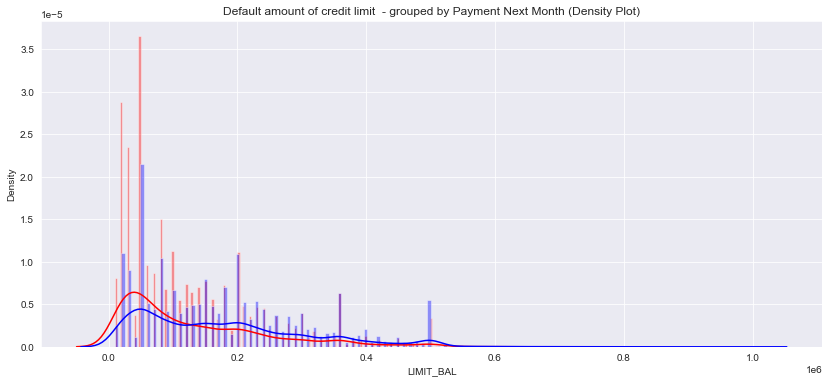

In [11]:
class_0 = train.loc[train['defaultPay'] == 0]["LIMIT_BAL"]
class_1 = train.loc[train['defaultPay'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Default amount of credit limit  - grouped by Payment Next Month (Density Plot)')
sb.set_color_codes("pastel")
sb.distplot(class_1,kde=True,bins=200, color="red")
sb.distplot(class_0,kde=True,bins=200, color="blue")
plt.show()

In [12]:
train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaultPay
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
train.SEX[train.SEX == 1] = 'male'
train.SEX[train.SEX == 2] = 'female'

In [14]:
# 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
train.EDUCATION[train.EDUCATION == 1] = 'gradSchool'
train.EDUCATION[train.EDUCATION == 2] = 'university'
train.EDUCATION[train.EDUCATION == 3] = 'highSchool'
train.EDUCATION[train.EDUCATION == 4] = 'others'
train.EDUCATION[train.EDUCATION == 5] = 'unknown'
train.EDUCATION[train.EDUCATION == 6] = 'unknown'

In [15]:
train.MARRIAGE[train.MARRIAGE == 1] = 'married'
train.MARRIAGE[train.MARRIAGE == 2] = 'single'
train.MARRIAGE[train.MARRIAGE == 3] = 'others'

<AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>

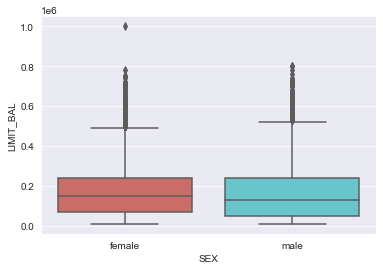

In [16]:
sb.boxplot(x='SEX', y='LIMIT_BAL', data=train, palette='hls')

<AxesSubplot:xlabel='EDUCATION', ylabel='LIMIT_BAL'>

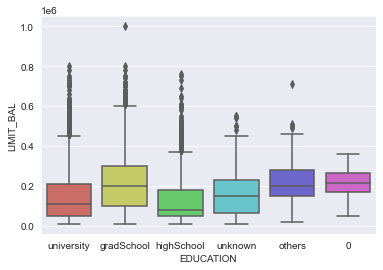

In [17]:
sb.boxplot(x='EDUCATION', y='LIMIT_BAL', data=train, palette='hls')

<AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

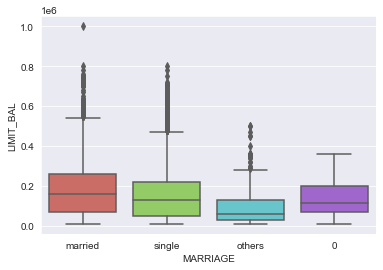

In [18]:
sb.boxplot(x='MARRIAGE', y='LIMIT_BAL', data=train, palette='hls')

In [19]:
pd.crosstab(index = train["EDUCATION"], columns=train["defaultPay"])

defaultPay,0,1
EDUCATION,,
0,14,0
gradSchool,8549,2036
highSchool,3680,1237
others,116,7
university,10700,3330
unknown,305,26


In [20]:
pd.crosstab(index = train["MARRIAGE"], columns=train["defaultPay"])

defaultPay,0,1
MARRIAGE,,
0,49,5
married,10453,3206
others,239,84
single,12623,3341


In [21]:
pd.crosstab(index = train["SEX"], columns=train["defaultPay"])

defaultPay,0,1
SEX,,
female,14349,3763
male,9015,2873


In [22]:
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width,6))
    s = sb.boxplot(ax = ax1, x=feature1, y=feature2, hue=feature3,
                data=train, palette="PRGn",showfliers=False)
    s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.show();

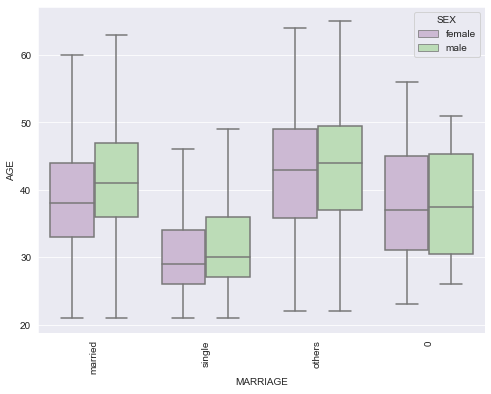

In [23]:
boxplot_variation('MARRIAGE','AGE', 'SEX',8)


In [24]:
train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,defaultPay
0,1,20000,female,university,married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,female,university,single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,female,university,single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,female,university,married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,male,university,married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [25]:
del train['ID']

In [26]:
# Get column names first
names = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
         'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(train[names])
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [27]:
train = train.drop(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
         'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], axis = 1) 

In [28]:
train.shape

(30000, 10)

In [29]:
scaled_df.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,-1.246020,-0.642501,-0.647399,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,-1.029047,-0.659219,-0.666747,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,-0.161156,-0.298560,-0.493899,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.164303,-0.057491,-0.013293,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,2.334029,-0.578618,-0.611318,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [30]:
train = pd.concat([train, scaled_df], axis = 1)

In [31]:
train.head()

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,defaultPay,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,female,university,married,2,2,-1,-1,-2,-2,1,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,female,university,single,-1,2,0,0,0,2,1,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,female,university,single,0,0,0,0,0,0,0,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,female,university,married,0,0,0,0,0,0,0,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,male,university,married,-1,0,-1,0,0,0,0,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [32]:
train.shape

(30000, 24)

In [33]:
cat_columns = ['SEX', 'EDUCATION', 'MARRIAGE']
train = pd.get_dummies(train, prefix_sep="_", columns=cat_columns)

In [34]:
train.head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,defaultPay,LIMIT_BAL,AGE,BILL_AMT1,...,EDUCATION_0,EDUCATION_gradSchool,EDUCATION_highSchool,EDUCATION_others,EDUCATION_university,EDUCATION_unknown,MARRIAGE_0,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,2,2,-1,-1,-2,-2,1,-1.136720,-1.246020,-0.642501,...,0,0,0,0,1,0,0,1,0,0
1,-1,2,0,0,0,2,1,-0.365981,-1.029047,-0.659219,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,-0.597202,-0.161156,-0.298560,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,-0.905498,0.164303,-0.057491,...,0,0,0,0,1,0,0,1,0,0
4,-1,0,-1,0,0,0,0,-0.905498,2.334029,-0.578618,...,0,0,0,0,1,0,0,1,0,0


In [35]:
train.columns

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'defaultPay',
       'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female', 'SEX_male',
       'EDUCATION_0', 'EDUCATION_gradSchool', 'EDUCATION_highSchool',
       'EDUCATION_others', 'EDUCATION_university', 'EDUCATION_unknown',
       'MARRIAGE_0', 'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single'],
      dtype='object')

In [36]:
train.MARRIAGE_0.value_counts()

0    29946
1       54
Name: MARRIAGE_0, dtype: int64

In [37]:
train.EDUCATION_0.value_counts()

0    29986
1       14
Name: EDUCATION_0, dtype: int64

In [38]:
train.MARRIAGE_single.value_counts()

1    15964
0    14036
Name: MARRIAGE_single, dtype: int64

In [39]:
train.columns

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'defaultPay',
       'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_female', 'SEX_male',
       'EDUCATION_0', 'EDUCATION_gradSchool', 'EDUCATION_highSchool',
       'EDUCATION_others', 'EDUCATION_university', 'EDUCATION_unknown',
       'MARRIAGE_0', 'MARRIAGE_married', 'MARRIAGE_others', 'MARRIAGE_single'],
      dtype='object')

In [40]:
y = train.loc[:, train.columns == 'defaultPay']
X = train.loc[:, train.columns != 'defaultPay']

### SMOTE algorithm

In [41]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
columns = X_train.columns

In [42]:
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['defaultPay'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['defaultPay']==0]))
print("Number of subscription",len(os_data_y[os_data_y['defaultPay']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['defaultPay']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['defaultPay']==1])/len(os_data_X))

length of oversampled data is  34978
Number of no subscription in oversampled data 17489
Number of subscription 17489
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [43]:
os_data_X.shape

(34978, 32)

In [44]:
os_data_y.shape

(34978, 1)

In [45]:
logmodel = LogisticRegression()
logmodel.fit(os_data_X,os_data_y)

LogisticRegression()

In [46]:
predictions = logmodel.predict(X_test)

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      5875
           1       0.44      0.53      0.48      1625

    accuracy                           0.75      7500
   macro avg       0.65      0.67      0.66      7500
weighted avg       0.77      0.75      0.76      7500



In [48]:
def plot_roc_curve(fpr, tpr):  
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [49]:
predictions.shape

(7500,)

In [50]:
auc = roc_auc_score(y_test, predictions)  
print('AUC: %.2f' % auc)  

AUC: 0.67


In [51]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)  

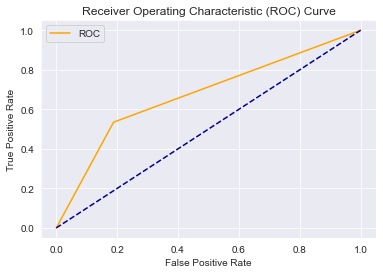

In [52]:
plot_roc_curve(fpr, tpr)

In [53]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test,predictions)

#confusion_matrix = confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[4770 1105]
 [ 756  869]]


In [54]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the testing dataset: 53.47692307692308%


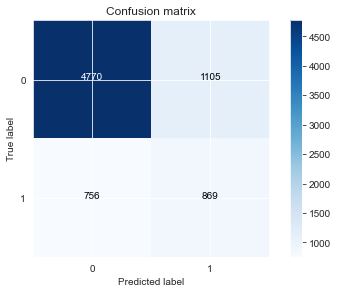

In [55]:
print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
